In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rock=pd.read_csv("salaries.csv")

In [3]:
rock

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


<Axes: xlabel='salary_more_then_100k', ylabel='count'>

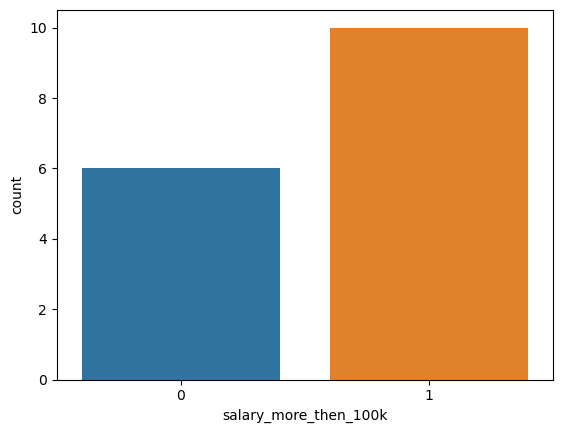

In [4]:
sns.countplot(x="salary_more_then_100k",data=rock)

<Axes: xlabel='degree', ylabel='salary_more_then_100k'>

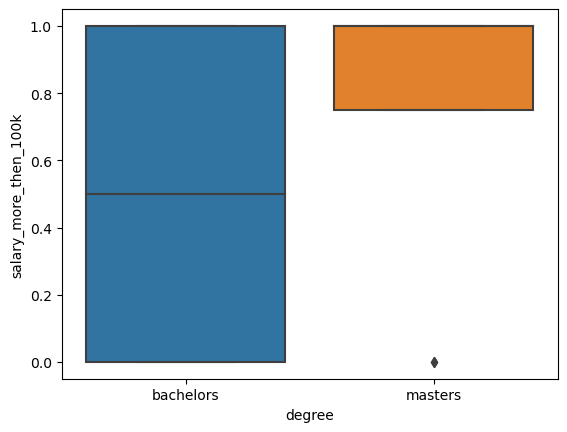

In [5]:
sns.boxplot(x="degree",y="salary_more_then_100k",data=rock)

<Axes: ylabel='Frequency'>

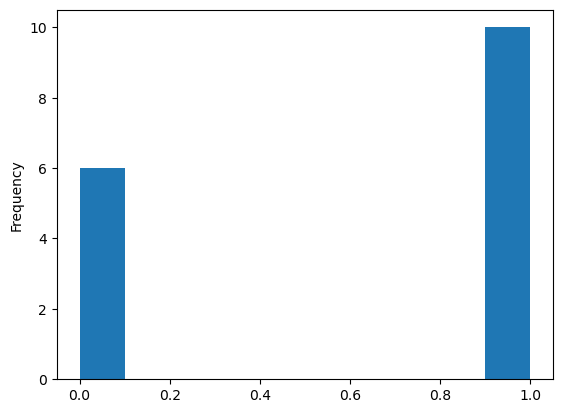

In [6]:
rock["salary_more_then_100k"].plot.hist()

In [7]:
X = rock[['company', 'job', 'degree']]
y = rock['salary_more_then_100k']

# One-hot encode categorical variables

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
x=X_encoded

# Split data into train and test sets

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Train the Random Forest model

In [10]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=5,criterion='gini',random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

# Evaluate the mode

In [11]:
from sklearn.metrics import classification_report,accuracy_score
prediction=model.predict(x_test)
accuracy=accuracy_score(y_test,prediction)
print(accuracy*100)
print(classification_report(y_test,prediction))

25.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



# Ensemble learning is a machine learning technique where multiple models are combined to improve overall performance, accuracy, and robustness. Instead of relying on a single model, it uses a collection of models to make better predictions.